In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

In [2]:
params = {
    'legend.fontsize': 'x-large',
    'legend.title_fontsize': 'x-large',
    'figure.figsize': (16, 4), # 2.2*len(csvs)
    'axes.labelsize': 'x-large',
    'axes.titlesize':'x-large',
    'xtick.labelsize':'x-large',
    'ytick.labelsize':'x-large',
    'xtick.major.size': 7.0,
    'ytick.major.size': 3.0
}
pylab.rcParams.update(params)

In [3]:
def plot_ecdfs(filepath, savepath='', second_pkl='', min_degree=2, max_degree=7, x_min=0, x_max=1, label_columns=6, title=''):
    results = []
    with open(filepath, 'rb') as handle:
        results.append(pickle.load(handle))
    if len(second_pkl) > 0:
        with open(second_pkl, 'rb') as handle:
            results.append(pickle.load(handle))
    fig, axs = plt.subplots(2, 2, figsize=(8.5,5))

    step_size = 100 # to accelerate plot generation
    indices = [(0,0), (0,1), (1,0), (1,1)]
    
    for result_idx, result in enumerate(results):
        if result_idx == 0:
            alpha = 1.0
            linestyle='solid'
        else:
            alpha = 0.5
            linestyle='dashed'

        for idx, (dataset, power_2_pad, dataset_results) in enumerate(result):
            degrees = [1,2,3,4,5,6,7,8,9,10]
            degree_results = [dataset_results[i-1] for i in degrees]
            
            for degree, differences in degree_results:
                if degree < min_degree or degree > max_degree:
                    continue
                n = np.arange(1,len(differences[::step_size])+1) / np.float(len(differences) / step_size)
                axs[indices[idx]].step(
                    differences[::step_size], n, label='{}'.format(degree),
                    linewidth=2, linestyle=linestyle, alpha=alpha
                )
                axs[indices[idx]].set_title('{}, d={}'.format(dataset[0], power_2_pad))
                if indices[idx][1] == 0:
                    axs[indices[idx]].set_ylabel('ECDF')
                if x_max > 1 and result_idx == 0:
                    axs[indices[idx]].vlines(x=1.0, ymin=0, ymax=1.0, colors='black', label='', linestyles='dashed')
                #axs[idx].hlines(y=0.5, xmin=0, xmax=2.0, colors='black', label='', linestyles='dashed')

                if indices[idx][1] > 0:
                    axs[indices[idx]].set_yticks([])
                if indices[idx][0] == 1:
                    ticks = np.arange(0, x_max+0.5, 0.5)
                    axs[indices[idx]].set_xticks(ticks)
                    #axs[indices[idx]].set_xticklabels(['0', '0.5', '1'])
                    axs[indices[idx]].set_xlabel('Variance ratio')
                else:
                    axs[indices[idx]].set_xticks([])
                    axs[indices[idx]].set_xticklabels([])

                axs[indices[idx]].set_xlim(x_min, x_max)
                #axs[idx].legend(ncol=2, loc='upper center', bbox_to_anchor=(0.5, -0.3))


    handles, labels = axs[indices[0]].get_legend_handles_labels()
    #fig.suptitle(title)
    #fig.subplots_adjust(top=0.88)
    plt.tight_layout()

    #legend = plt.figlegend(handles=handles, labels=labels, loc='upper center', ncol=label_columns, bbox_to_anchor = (0,0.3,1.01,0.85), bbox_transform=plt.gcf().transFigure)
    legend = plt.figlegend(handles=handles, labels=labels, loc='center right', title='p', ncol=label_columns, bbox_to_anchor = (0.1,0.1,1.01,0.85), bbox_transform=plt.gcf().transFigure)
    if len(savepath) > 0:
        plt.savefig(savepath, dpi=300, bbox_inches="tight")
    plt.show()

## Rademacher

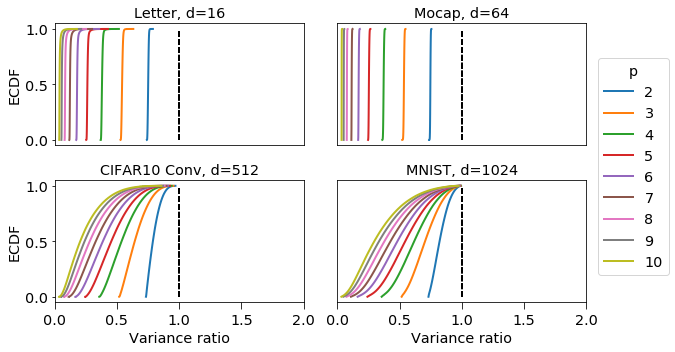

In [8]:
plot_ecdfs(
    '../saved_models/ecdf_plots/rademacher_ctr_r_norm.pkl',
    '../figures/comp_rad_real_rad_norm.pdf',
    min_degree=2,
    max_degree=10,
    label_columns=1,
    x_min = 0,
    x_max = 2,
)

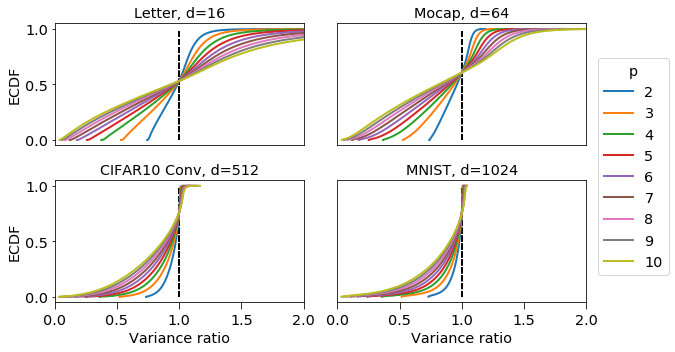

In [7]:
plot_ecdfs(
    '../saved_models/ecdf_plots/rademacher_ctr_r_norm_zero.pkl',
    '../figures/comp_rad_real_rad_norm_zero.pdf',
    min_degree=2,
    max_degree=10,
    label_columns=1,
    x_min = 0,
    x_max = 2,
)

## TensorSRHT

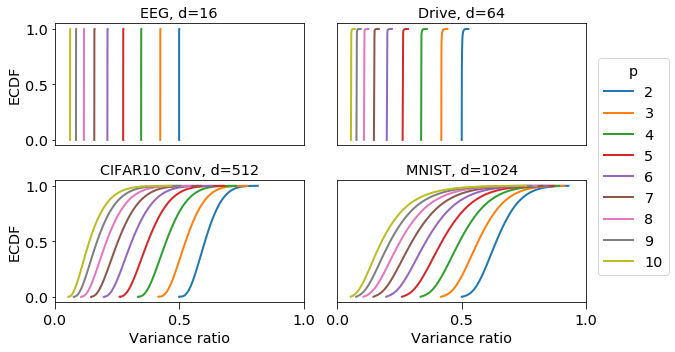

In [25]:
plot_ecdfs(
    '../saved_models/ecdf_plots/tensorsrht_ctr_r_norm.pkl',
    '../figures/comp_tensor_srht_real_tensor_srht_norm.pdf',
    min_degree=2,
    max_degree=10,
    label_columns=1,
    title='Var(CtR-TensorSRHT) / Var(TensorSRHT)'
)

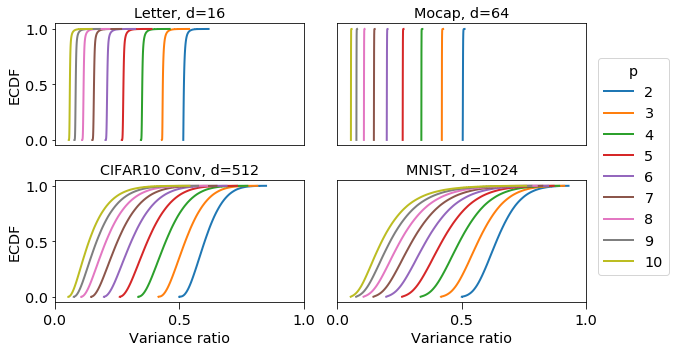

In [5]:
plot_ecdfs(
    '../saved_models/ecdf_plots/tensorsrht_ctr_r_norm.pkl',
    '../figures/comp_tensor_srht_real_tensor_srht_norm.pdf',
    min_degree=2,
    max_degree=10,
    label_columns=1,
    title='Var(CtR-TensorSRHT) / Var(TensorSRHT)'
)

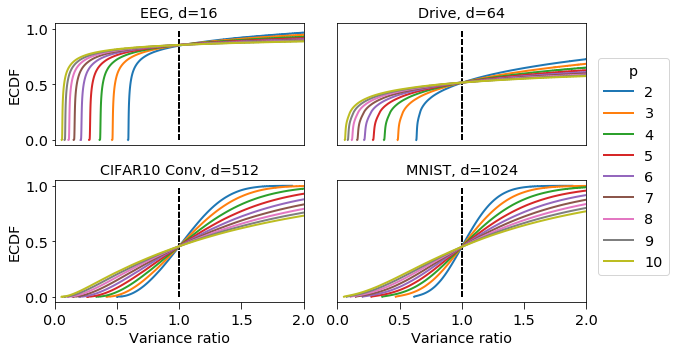

In [37]:
plot_ecdfs(
    '../saved_models/ecdf_plots/comp_tensor_srht_real_tensor_srht_norm_zero.pkl',
    '../figures/comp_tensor_srht_real_tensor_srht_norm_zero.pdf',
    min_degree=2,
    max_degree=10,
    label_columns=1,
    x_min = 0,
    x_max = 2,
)

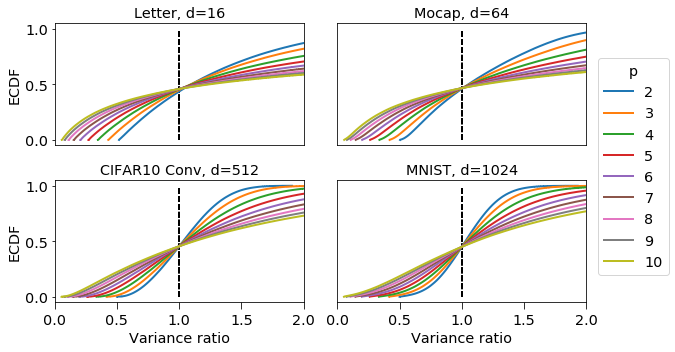

In [6]:
plot_ecdfs(
    '../saved_models/ecdf_plots/comp_tensor_srht_real_tensor_srht_norm_zero.pkl',
    '../figures/comp_tensor_srht_real_tensor_srht_norm_zero.pdf',
    min_degree=2,
    max_degree=10,
    label_columns=1,
    x_min = 0,
    x_max = 2,
)

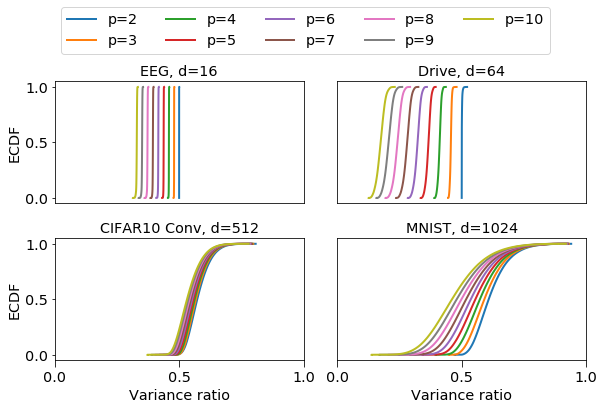

In [71]:
# train data
plot_ecdfs(
    '../saved_models/ecdf_plots/tensorsrht_ctr_r_minmax.pkl',
    '../figures/comp_tensor_srht_real_tensor_srht_minmax.pdf',
    min_degree=2,
    max_degree=10,
    label_columns=5
)

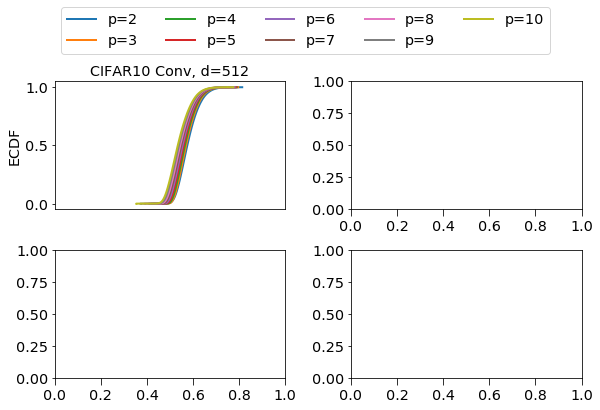

In [7]:
# test data

plot_ecdfs(
    '../saved_models/ecdf_plots/tensorsrht_ctr_r_minmax_test.pkl',
    '../figures/comp_tensor_srht_real_tensor_srht_minmax_test.pdf',
    min_degree=2,
    max_degree=10,
    label_columns=5
)

## CtR TensorSRHT vs. TensorSketch

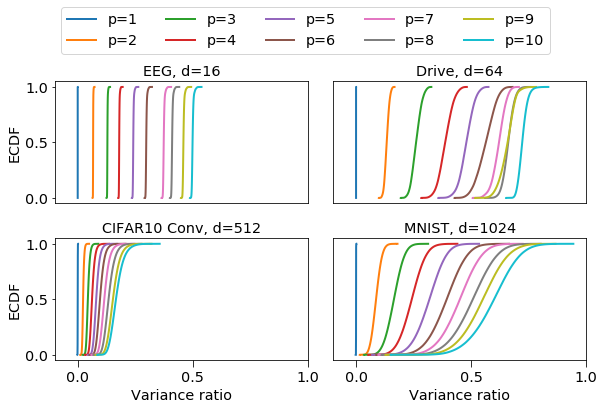

In [75]:
plot_ecdfs(
    '../saved_models/ecdf_plots/tensorsrht_ctr_tensorsketch_r_minmax.pkl',
    '../figures/comp_tensor_srht_tensor_sketch_minmax.pdf',
    min_degree=1,
    max_degree=10,
    label_columns=5,
    x_min = -0.1
)

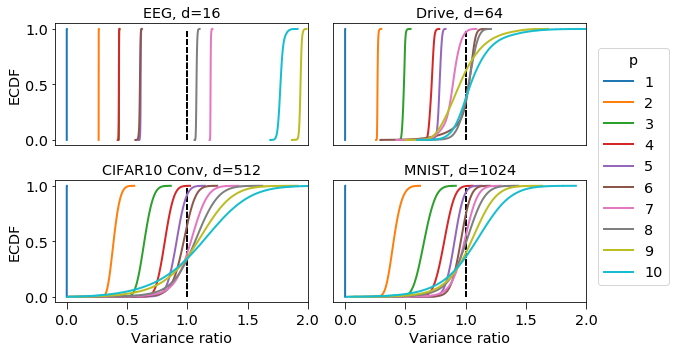

In [38]:
plot_ecdfs(
    '../saved_models/ecdf_plots/tensorsrht_ctr_tensorsketch_r_norm.pkl',
    '../figures/comp_tensor_srht_tensor_sketch_norm.pdf',
    min_degree=1,
    max_degree=10,
    x_min = -0.1,
    x_max = 2,
    label_columns=1
)

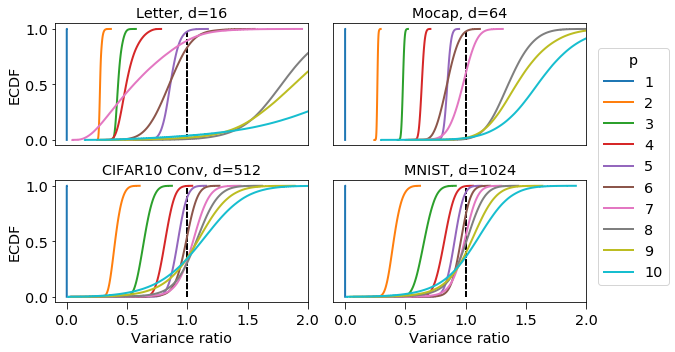

In [9]:
plot_ecdfs(
    '../saved_models/ecdf_plots/tensorsrht_ctr_tensorsketch_r_norm.pkl',
    '../figures/comp_tensor_srht_tensor_sketch_norm.pdf',
#     second_pkl='../saved_models/ecdf_plots/tensorsrht_r_tensorsketch_r_norm.pkl',
    min_degree=1,
    max_degree=10,
    x_min = -0.1,
    x_max = 2,
    label_columns=1
)

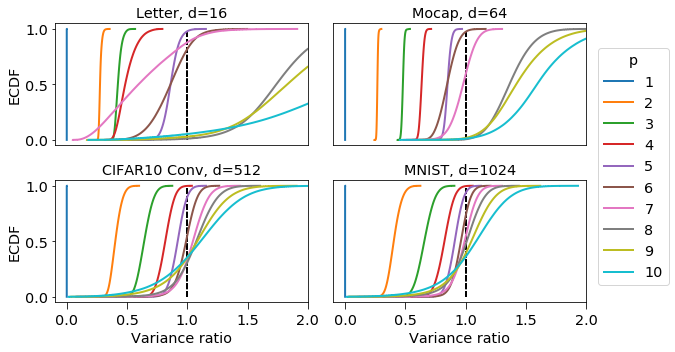

In [12]:
plot_ecdfs(
    '../saved_models/ecdf_plots/tensorsrht_ctr_tensorsketch_r_norm.pkl',
    '../figures/comp_tensor_srht_tensor_sketch_norm.pdf',
#     second_pkl='../saved_models/ecdf_plots/tensorsrht_r_tensorsketch_r_norm.pkl',
    min_degree=1,
    max_degree=10,
    x_min = -0.1,
    x_max = 2,
    label_columns=1
)

## R TensorSRHT vs. TensorSketch

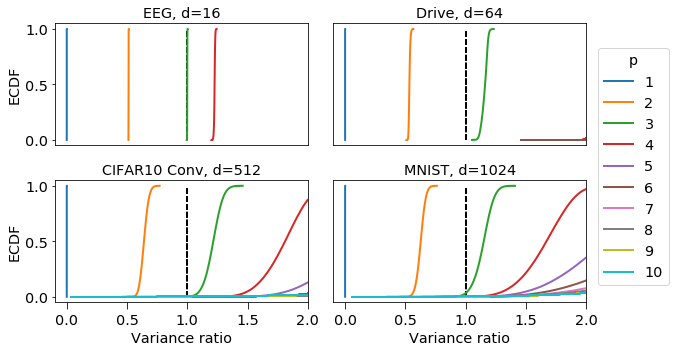

In [39]:
plot_ecdfs(
    '../saved_models/ecdf_plots/tensorsrht_r_tensorsketch_r_norm.pkl',
    '../figures/real_tensor_srht_tensor_sketch_norm.pdf',
    min_degree=1,
    max_degree=10,
    x_min = -0.1,
    x_max = 2,
    label_columns=1
)

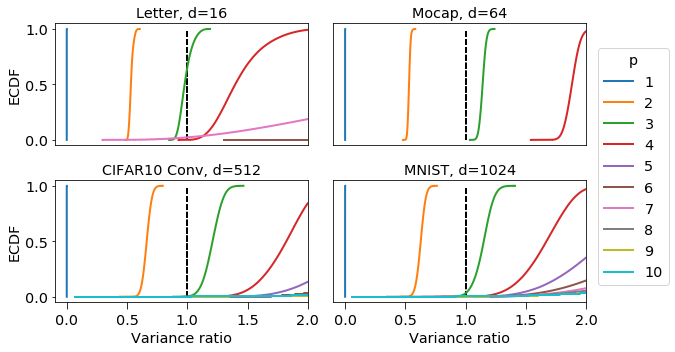

In [10]:
plot_ecdfs(
    '../saved_models/ecdf_plots/tensorsrht_r_tensorsketch_r_norm.pkl',
    '../figures/real_tensor_srht_tensor_sketch_norm.pdf',
    min_degree=1,
    max_degree=10,
    x_min = -0.1,
    x_max = 2,
    label_columns=1
)

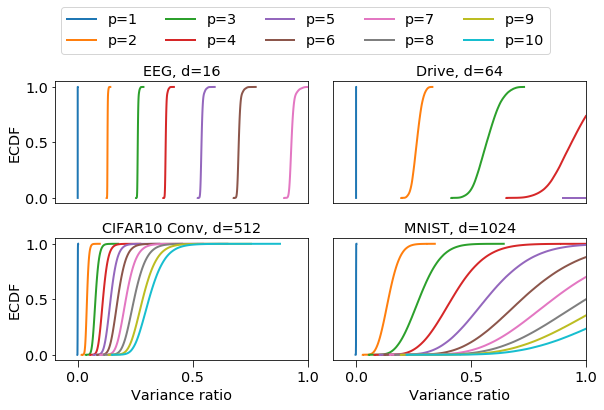

In [8]:
# on train data
plot_ecdfs(
    '../saved_models/ecdf_plots/tensorsrht_r_tensorsketch_r_minmax.pkl',
    '../figures/real_tensor_srht_tensor_sketch_minmax.pdf',
    min_degree=1,
    max_degree=10,
    x_min = -0.1,
    x_max = 1,
    label_columns=5
)

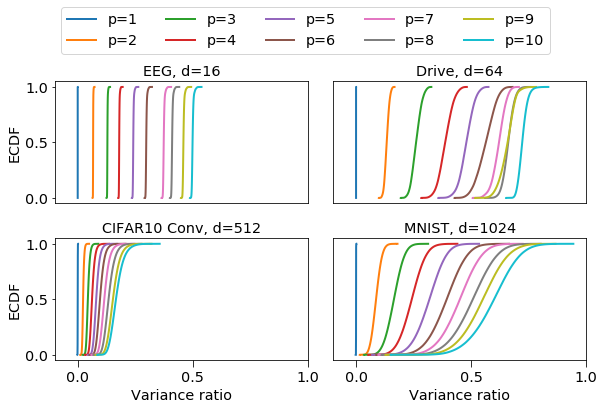

In [9]:
plot_ecdfs(
    '../saved_models/ecdf_plots/tensorsrht_ctr_tensorsketch_r_minmax.pkl',
    '../figures/comp_tensor_srht_tensor_sketch_minmax.pdf',
    min_degree=1,
    max_degree=10,
    label_columns=5,
    x_min = -0.1
)